## INSTALL PACKAGES AND READ CSV FILES FROM GITHUB

In [1]:
library(data.table)

In [2]:
library(stringr)

In [3]:
library(comprehenr) # for list comprehension; to_list

In [4]:
library(tibble)

In [5]:
library(pheatmap)

In [6]:
library(readr)

## create folder for haplotype frequency data

In [7]:
dir.create('./hapFreqOnly')

Warning message in dir.create("./hapFreqOnly"):
“'./hapFreqOnly' already exists”


## create folder for heatmap images

In [8]:
dir.create('./heatmap_images')

Warning message in dir.create("./heatmap_images"):
“'./heatmap_images' already exists”


## define function to compute percentage

In [9]:
prop <- function(col_name, pop_total) {
    the_list <- list()
    for (i in col_name) {
        x <-  (i * 100)/pop_total
        x <- format(round(x, 2), nsmall = 2)
        y <- paste (x)
        the_list <- append(the_list, y)
    }
    the_list
        }

## define function to create heatmaps

In [10]:
annotate_df <- data.frame(Population = 
                          c('Europe (EUR)', 'Europe (EUR)', 'Europe (EUR)', 'Europe (EUR)', 'Europe (EUR)', 
                           'Africa (AFR)', 'Africa (AFR)', 'Africa (AFR)', 'Africa (AFR)', 'Africa (AFR)', 'Africa (AFR)', 'Africa (AFR)', 
                           'Admixed America (AMR)', 'Admixed America (AMR)', 'Admixed America (AMR)', 'Admixed America (AMR)', 
                           'East Asia (EAS)', 'East Asia (EAS)', 'East Asia (EAS)', 'East Asia (EAS)', 'East Asia (EAS)', 
                           'South Asia (SAS)', 'South Asia (SAS)', 'South Asia (SAS)', 'South Asia (SAS)', 'South Asia (SAS)'
                           )
                         )
rownames(annotate_df) <- c('CEU', 'TSI', 'FIN', 'GBR', 'IBS', 
                            'YRI', 'LWK', 'GWD', 'MSL', 'ESN', 'ASW', 'ACB',
                            'MXL', 'PUR', 'CLM', 'PEL', 
                            'CHB', 'JPT', 'CHS', 'CDX', 'KHV',
                            'GIH', 'PJL', 'BEB', 'STU', 'ITU'
                          )

annotate_df

,Population
,<chr>
CEU,Europe (EUR)
TSI,Europe (EUR)
FIN,Europe (EUR)
GBR,Europe (EUR)
IBS,Europe (EUR)
YRI,Africa (AFR)
LWK,Africa (AFR)
GWD,Africa (AFR)
MSL,Africa (AFR)


In [11]:
convert_to_heatmaps <- function(df, image_name, file_name, column_cluster) {
    df_matrix <- data.matrix(df[,2:ncol(df)])
    rownames(df_matrix) <- df$polymorphisms
    setwd("./heatmap_images/")
    df_heatmap <- pheatmap(df_matrix, main = image_name, cellwidth = 15, cellheight = 12, 
                           color = colorRampPalette(c("blue","cyan", "yellow", "red", "black"))(50),
                           cluster_rows = F, cluster_cols = column_cluster, filename = file_name
                          )
    setwd("./..")
    }

In [12]:
convert_to_heatmaps_annotate <- function(df, image_name, file_name, column_cluster) {
    df_matrix <- data.matrix(df[,2:ncol(df)])
    rownames(df_matrix) <- df$polymorphisms
    setwd("./heatmap_images/")
    df_heatmap <- pheatmap(df_matrix, main = image_name, cellwidth = 15, cellheight = 12, 
                           color = colorRampPalette(c("blue","cyan", "yellow", "red", "black"))(50),
                           cluster_rows = F, cluster_cols = column_cluster, filename = file_name, 
                           annotation_col = annotate_df
                          )
    setwd("./..")
    }

## dataframes and heatmaps

In [13]:
cross_country <- read_csv("https://raw.github.com/BBLinus/pharmgenomics/main/compute_CROSS_COUNTRY.csv")

Rows: 41 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): POLYMORPHISM
dbl (6): ALL (n = 5008), EUR (n = 1006), AFR (n = 1322), AMR (n = 694), EAS ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
cross_country

POLYMORPHISM,ALL (n = 5008),EUR (n = 1006),AFR (n = 1322),AMR (n = 694),EAS (n = 1008),SAS (n = 978)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CYP2D6*2,1798,345,731,227,141,354
CYP2D6*3,28,19,3,4,0,2
CYP2D6*4,466,187,80,90,2,107
CYP2D6*6,24,20,1,2,0,1
CYP2D6*9,36,26,1,9,0,0
CYP2D6*10,1178,202,146,103,567,160
CYP2D6*14,10,0,0,0,10,0
CYP2D6*17,295,2,287,6,0,0
CYP2D6*41,317,94,24,42,38,119


In [15]:
polymorphisms <- cross_country$POLYMORPHISM

In [16]:
ALL = prop(cross_country$'ALL (n = 5008)', 5008)
EUR = prop(cross_country$'EUR (n = 1006)', 1006)
AFR = prop(cross_country$'AFR (n = 1322)', 1322)
AMR = prop(cross_country$'AMR (n = 694)', 694)
EAS = prop(cross_country$'EAS (n = 1008)', 1008)
SAS = prop(cross_country$'SAS (n = 978)', 978)

cross_country_list <- list (polymorphisms = polymorphisms,
                            'ALL' = ALL, 
                            'EUR' = EUR, 
                            'AFR' = AFR, 
                            'AMR' = AMR,
                            'EAS' = EAS,
                            'SAS' = SAS)

cross_country_prop <- as.data.frame(do.call(cbind, cross_country_list)) 
fwrite(cross_country_prop, file ="./hapFreqOnly/all.csv")
cross_country_prop

polymorphisms,ALL,EUR,AFR,AMR,EAS,SAS
<list>,<list>,<list>,<list>,<list>,<list>,<list>
CYP2D6*2,35.90,34.29,55.30,32.71,13.99,36.20
CYP2D6*3,0.56,1.89,0.23,0.58,0.00,0.20
CYP2D6*4,9.31,18.59,6.05,12.97,0.20,10.94
CYP2D6*6,0.48,1.99,0.08,0.29,0.00,0.10
CYP2D6*9,0.72,2.58,0.08,1.30,0.00,0.00
CYP2D6*10,23.52,20.08,11.04,14.84,56.25,16.36
CYP2D6*14,0.20,0.00,0.00,0.00,0.99,0.00
CYP2D6*17,5.89,0.20,21.71,0.86,0.00,0.00
CYP2D6*41,6.33,9.34,1.82,6.05,3.77,12.17


### CONTINENTS

In [17]:
convert_to_heatmaps(cross_country_prop, "", "continents.tiff", F)

In [18]:
european <- read_csv("https://raw.github.com/BBLinus/pharmgenomics/main/european_SNP_format.csv")

Rows: 41 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): POLYMORPHISM
dbl (7): ALL (n = 5008), EUR (n = 1006), CEU (n = 198), TSI (n = 214), FIN (...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
european

POLYMORPHISM,ALL (n = 5008),EUR (n = 1006),CEU (n = 198),TSI (n = 214),FIN (n = 198),GBR (n = 182),IBS (n = 214)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CYP2D6*2,1798,345,64,80,64,56,81
CYP2D6*3,28,19,4,0,7,6,2
CYP2D6*4,466,187,45,40,27,42,31
CYP2D6*6,24,20,4,4,9,2,1
CYP2D6*9,36,26,4,7,3,7,5
CYP2D6*10,1178,202,47,44,29,45,37
CYP2D6*14,10,0,0,0,0,0,0
CYP2D6*17,295,2,0,0,0,0,2
CYP2D6*41,317,94,24,31,7,13,19


In [20]:
ALL = prop(european$'ALL (n = 5008)', 5008)
EUR = prop(european$'EUR (n = 1006)', 1006)
CEU = prop(european$'CEU (n = 198)', 198)
TSI = prop(european$'TSI (n = 214)', 214)
FIN = prop(european$'FIN (n = 198)', 198)
GBR = prop(european$'GBR (n = 182)', 182)
IBS = prop(european$'IBS (n = 214)', 214)

european_list <- list (polymorphisms = polymorphisms,
                       'ALL' = ALL, 
                       'EUR' = EUR, 
                       'CEU' = CEU, 
                       'TSI' = TSI,
                       'FIN' = FIN,
                       'GBR' = GBR, 
                       'IBS' = IBS)

european_prop <- as.data.frame(do.call(cbind, european_list)) 
fwrite(european_prop, file ="./hapFreqOnly/European.csv")
european_prop

polymorphisms,ALL,EUR,CEU,TSI,FIN,GBR,IBS
<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
CYP2D6*2,35.90,34.29,32.32,37.38,32.32,30.77,37.85
CYP2D6*3,0.56,1.89,2.02,0.00,3.54,3.30,0.93
CYP2D6*4,9.31,18.59,22.73,18.69,13.64,23.08,14.49
CYP2D6*6,0.48,1.99,2.02,1.87,4.55,1.10,0.47
CYP2D6*9,0.72,2.58,2.02,3.27,1.52,3.85,2.34
CYP2D6*10,23.52,20.08,23.74,20.56,14.65,24.73,17.29
CYP2D6*14,0.20,0.00,0.00,0.00,0.00,0.00,0.00
CYP2D6*17,5.89,0.20,0.00,0.00,0.00,0.00,0.93
CYP2D6*41,6.33,9.34,12.12,14.49,3.54,7.14,8.88


### EUROPE

In [21]:
convert_to_heatmaps(european_prop, "europe", "europe.tiff", F)

In [22]:
intra_africa <- read_csv("https://raw.github.com/BBLinus/pharmgenomics/main/compute_INTRA_AFRICA.csv")

Rows: 41 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): POLYMORPHISM
dbl (9): ALL (n = 5008), AFR (n = 1322), YRI (n = 216), LWK (n = 198), GWD (...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
intra_africa

POLYMORPHISM,ALL (n = 5008),AFR (n = 1322),YRI (n = 216),LWK (n = 198),GWD (n = 226),MSL (n = 170),ESN (n = 198),ASW (n = 122),ACB (n = 192)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CYP2D6*2,1798,731,121,128,120,104,112,51,95
CYP2D6*3,28,3,0,0,0,0,0,2,1
CYP2D6*4,466,80,12,5,9,7,15,15,16
CYP2D6*6,24,1,0,0,0,0,0,1,0
CYP2D6*9,36,1,0,0,0,0,0,1,0
CYP2D6*10,1178,146,23,7,26,27,18,19,26
CYP2D6*14,10,0,0,0,0,0,0,0,0
CYP2D6*17,295,287,55,38,37,47,52,18,40
CYP2D6*41,317,24,2,6,1,1,3,2,9


In [24]:
ALL = prop(intra_africa$'ALL (n = 5008)', 5008)
AFR = prop(intra_africa$'AFR (n = 1322)', 1322)
YRI = prop(intra_africa$'YRI (n = 216)', 216)
LWK = prop(intra_africa$'LWK (n = 198)', 198)
GWD = prop(intra_africa$'GWD (n = 226)', 226)
MSL = prop(intra_africa$'MSL (n = 170)', 170)
ESN = prop(intra_africa$'ESN (n = 198)', 198)
ASW = prop(intra_africa$'ASW (n = 122)', 122)
ACB = prop(intra_africa$'ACB (n = 192)', 192)

africa_list <- list (polymorphisms = polymorphisms,
                     'ALL' = ALL, 
                     'AFR' = AFR, 
                     'YRI' = YRI, 
                     'LWK' = LWK,
                     'GWD' = GWD,
                     'MSL' = MSL, 
                     'ESN' = ESN,
                     'ASW' = ASW,
                     'ACB' = ACB)


africa_prop <- as.data.frame(do.call(cbind, africa_list)) 
fwrite(africa_prop, file ="./hapFreqOnly/African.csv")
africa_prop

polymorphisms,ALL,AFR,YRI,LWK,GWD,MSL,ESN,ASW,ACB
<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
CYP2D6*2,35.90,55.30,56.02,64.65,53.10,61.18,56.57,41.80,49.48
CYP2D6*3,0.56,0.23,0.00,0.00,0.00,0.00,0.00,1.64,0.52
CYP2D6*4,9.31,6.05,5.56,2.53,3.98,4.12,7.58,12.30,8.33
CYP2D6*6,0.48,0.08,0.00,0.00,0.00,0.00,0.00,0.82,0.00
CYP2D6*9,0.72,0.08,0.00,0.00,0.00,0.00,0.00,0.82,0.00
CYP2D6*10,23.52,11.04,10.65,3.54,11.50,15.88,9.09,15.57,13.54
CYP2D6*14,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CYP2D6*17,5.89,21.71,25.46,19.19,16.37,27.65,26.26,14.75,20.83
CYP2D6*41,6.33,1.82,0.93,3.03,0.44,0.59,1.52,1.64,4.69


### AFRICA

In [25]:
convert_to_heatmaps(africa_prop, "africa", "africa.tiff", F)

In [26]:
ad_mixed_american <- read_csv("https://raw.github.com/BBLinus/pharmgenomics/main/ad_mixed_american_SNP_format.csv")

Rows: 41 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): POLYMORPHISM
dbl (6): ALL (n = 5008), AMR (n = 694), MXL (n = 128), PUR (n = 208), CLM (n...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [27]:
ad_mixed_american

POLYMORPHISM,ALL (n = 5008),AMR (n = 694),MXL (n = 128),PUR (n = 208),CLM (n = 188),PEL (n = 170)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CYP2D6*2,1798,227,33,81,56,55
CYP2D6*3,28,4,0,1,3,0
CYP2D6*4,466,90,16,32,31,11
CYP2D6*6,24,2,0,0,2,0
CYP2D6*9,36,9,1,5,3,0
CYP2D6*10,1178,103,19,37,35,12
CYP2D6*14,10,0,0,0,0,0
CYP2D6*17,295,6,0,2,2,2
CYP2D6*41,317,42,2,25,14,1


In [28]:
ALL = prop(ad_mixed_american$'ALL (n = 5008)', 5008)
AMR = prop(ad_mixed_american$'AMR (n = 694)', 694)
MXL = prop(ad_mixed_american$'MXL (n = 128)', 128)
PUR = prop(ad_mixed_american$'PUR (n = 208)', 208)
CLM = prop(ad_mixed_american$'CLM (n = 188)', 188)
PEL = prop(ad_mixed_american$'PEL (n = 170)', 170)


ad_mixed_american_list <- list (polymorphisms = polymorphisms,
                                'ALL' = ALL, 
                                'AMR' = AMR, 
                                'MXL' = MXL, 
                                'PUR' = PUR,
                                'CLM' = CLM,
                                'PEL' = PEL)


ad_mixed_american_prop <- as.data.frame(do.call(cbind, ad_mixed_american_list)) 
fwrite(ad_mixed_american_prop, file ="./hapFreqOnly/admixedAmerican.csv")
ad_mixed_american_prop

polymorphisms,ALL,AMR,MXL,PUR,CLM,PEL
<list>,<list>,<list>,<list>,<list>,<list>,<list>
CYP2D6*2,35.90,32.71,25.78,38.94,29.79,32.35
CYP2D6*3,0.56,0.58,0.00,0.48,1.60,0.00
CYP2D6*4,9.31,12.97,12.50,15.38,16.49,6.47
CYP2D6*6,0.48,0.29,0.00,0.00,1.06,0.00
CYP2D6*9,0.72,1.30,0.78,2.40,1.60,0.00
CYP2D6*10,23.52,14.84,14.84,17.79,18.62,7.06
CYP2D6*14,0.20,0.00,0.00,0.00,0.00,0.00
CYP2D6*17,5.89,0.86,0.00,0.96,1.06,1.18
CYP2D6*41,6.33,6.05,1.56,12.02,7.45,0.59


### ADMIXED AMERICA

In [29]:
convert_to_heatmaps(ad_mixed_american_prop, "america", "america.tiff", F)

In [30]:
east_asian <- read_csv("https://raw.github.com/BBLinus/pharmgenomics/main/east_asian_SNP_format.csv")

Rows: 41 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): POLYMORPHISM
dbl (7): ALL (n = 5008), EAS (n = 1008), CHB (n = 206), JPT (n = 208), CHS (...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
east_asian

POLYMORPHISM,ALL (n = 5008),EAS (n = 1008),CHB (n = 206),JPT (n = 208),CHS (n = 210),CDX (n = 186),KHV (n = 198)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CYP2D6*2,1798,141,34,29,28,24,26
CYP2D6*3,28,0,0,0,0,0,0
CYP2D6*4,466,2,1,0,0,0,1
CYP2D6*6,24,0,0,0,0,0,0
CYP2D6*9,36,0,0,0,0,0,0
CYP2D6*10,1178,567,122,75,127,115,128
CYP2D6*14,10,10,1,1,0,3,5
CYP2D6*17,295,0,0,0,0,0,0
CYP2D6*41,317,38,7,1,10,15,5


In [32]:
ALL = prop(east_asian$'ALL (n = 5008)', 5008)
EAS = prop(east_asian$'EAS (n = 1008)', 1008)
CHB = prop(east_asian$'CHB (n = 206)', 206)
JPT = prop(east_asian$'JPT (n = 208)', 208)
CHS = prop(east_asian$'CHS (n = 210)', 210)
CDX = prop(east_asian$'CDX (n = 186)', 186)
KHV = prop(east_asian$'KHV (n = 198)', 198)

east_asian_list <- list (polymorphisms = polymorphisms,
                         'ALL' = ALL, 
                         'EAS' = EAS, 
                         'CHB' = CHB, 
                         'JPT' = JPT,
                         'CHS' = CHS,             
                         'CDX' = CDX,
                         'KHV' = KHV)


east_asian_prop <- as.data.frame(do.call(cbind, east_asian_list)) 
fwrite(east_asian_prop, file ="./hapFreqOnly/eastAsian.csv")
east_asian_prop

polymorphisms,ALL,EAS,CHB,JPT,CHS,CDX,KHV
<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
CYP2D6*2,35.90,13.99,16.50,13.94,13.33,12.90,13.13
CYP2D6*3,0.56,0.00,0.00,0.00,0.00,0.00,0.00
CYP2D6*4,9.31,0.20,0.49,0.00,0.00,0.00,0.51
CYP2D6*6,0.48,0.00,0.00,0.00,0.00,0.00,0.00
CYP2D6*9,0.72,0.00,0.00,0.00,0.00,0.00,0.00
CYP2D6*10,23.52,56.25,59.22,36.06,60.48,61.83,64.65
CYP2D6*14,0.20,0.99,0.49,0.48,0.00,1.61,2.53
CYP2D6*17,5.89,0.00,0.00,0.00,0.00,0.00,0.00
CYP2D6*41,6.33,3.77,3.40,0.48,4.76,8.06,2.53


### EAST ASIA

In [33]:
convert_to_heatmaps(east_asian_prop, "east asia", "eastAsia.tiff", F)

In [34]:
south_asian <- read_csv("https://raw.github.com/BBLinus/pharmgenomics/main/south_asian_SNP_format.csv")

Rows: 41 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): POLYMORPHISM
dbl (7): ALL (n = 5008), SAS (n = 978), GIH (n = 206), PJL (n = 192), BEB (n...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
south_asian

POLYMORPHISM,ALL (n = 5008),SAS (n = 978),GIH (n = 206),PJL (n = 192),BEB (n = 172),STU (n = 204),ITU (n = 204)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CYP2D6*2,1798,354,91,61,43,77,82
CYP2D6*3,28,2,1,0,1,0,0
CYP2D6*4,466,107,26,15,21,22,23
CYP2D6*6,24,1,0,1,0,0,0
CYP2D6*9,36,0,0,0,0,0,0
CYP2D6*10,1178,160,31,20,43,31,35
CYP2D6*17,295,0,0,0,0,0,0
CYP2D6*41,317,119,30,21,16,24,28
CYP2C19*2,1108,350,68,66,56,84,76


In [36]:
ALL = prop(south_asian$'ALL (n = 5008)', 5008)
SAS = prop(south_asian$'SAS (n = 978)', 978)
GIH = prop(south_asian$'GIH (n = 206)', 206)
PJL = prop(south_asian$'PJL (n = 192)', 192)
BEB = prop(south_asian$'BEB (n = 172)', 172)
STU = prop(south_asian$'STU (n = 204)', 204)
ITU = prop(south_asian$'ITU (n = 204)', 204)

south_asian_list <- list (polymorphisms = polymorphisms,
                          'ALL' = ALL, 
                          'SAS' = SAS, 
                          'GIH' = GIH, 
                          'PJL' = PJL,
                          'BEB' = BEB,             
                          'STU' = STU,
                          'ITU' = ITU)


south_asian_prop <- as.data.frame(do.call(cbind, south_asian_list)) 
fwrite(south_asian_prop, file ="./hapFreqOnly/southAsian.csv")
south_asian_prop

polymorphisms,ALL,SAS,GIH,PJL,BEB,STU,ITU
<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
CYP2D6*2,35.90,36.20,44.17,31.77,25.00,37.75,40.20
CYP2D6*3,0.56,0.20,0.49,0.00,0.58,0.00,0.00
CYP2D6*4,9.31,10.94,12.62,7.81,12.21,10.78,11.27
CYP2D6*6,0.48,0.10,0.00,0.52,0.00,0.00,0.00
CYP2D6*9,0.72,0.00,0.00,0.00,0.00,0.00,0.00
CYP2D6*10,23.52,16.36,15.05,10.42,25.00,15.20,17.16
CYP2D6*14,5.89,0.00,0.00,0.00,0.00,0.00,0.00
CYP2D6*17,6.33,12.17,14.56,10.94,9.30,11.76,13.73
CYP2D6*41,22.12,35.79,33.01,34.38,32.56,41.18,37.25


### SOUTH ASIA

In [37]:
convert_to_heatmaps(south_asian_prop, "south asia", "southAsia.tiff", F)

### COMBINED DATAFRAME

In [38]:
a <- subset(european_prop, select = -c(ALL,EUR))
b <- subset(africa_prop, select = -c(polymorphisms,ALL,AFR))
c <- subset(ad_mixed_american_prop, select = -c(polymorphisms,ALL,AMR))
d <- subset(east_asian_prop, select = -c(polymorphisms,ALL,EAS))
e <- subset(south_asian_prop, select = -c(polymorphisms,ALL,SAS))

combine_data <- cbind(a,b,c,d,e)
combine_data

,polymorphisms,CEU,TSI,FIN,GBR,IBS,YRI,LWK,GWD,MSL,⋯,CHB,JPT,CHS,CDX,KHV,GIH,PJL,BEB,STU,ITU
,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,CYP2D6*2,32.32,37.38,32.32,30.77,37.85,56.02,64.65,53.10,61.18,⋯,16.50,13.94,13.33,12.90,13.13,44.17,31.77,25.00,37.75,40.20
2,CYP2D6*3,2.02,0.00,3.54,3.30,0.93,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.49,0.00,0.58,0.00,0.00
3,CYP2D6*4,22.73,18.69,13.64,23.08,14.49,5.56,2.53,3.98,4.12,⋯,0.49,0.00,0.00,0.00,0.51,12.62,7.81,12.21,10.78,11.27
4,CYP2D6*6,2.02,1.87,4.55,1.10,0.47,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.52,0.00,0.00,0.00
5,CYP2D6*9,2.02,3.27,1.52,3.85,2.34,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,CYP2D6*10,23.74,20.56,14.65,24.73,17.29,10.65,3.54,11.50,15.88,⋯,59.22,36.06,60.48,61.83,64.65,15.05,10.42,25.00,15.20,17.16
7,CYP2D6*14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.49,0.48,0.00,1.61,2.53,0.00,0.00,0.00,0.00,0.00
8,CYP2D6*17,0.00,0.00,0.00,0.00,0.93,25.46,19.19,16.37,27.65,⋯,0.00,0.00,0.00,0.00,0.00,14.56,10.94,9.30,11.76,13.73
9,CYP2D6*41,12.12,14.49,3.54,7.14,8.88,0.93,3.03,0.44,0.59,⋯,3.40,0.48,4.76,8.06,2.53,33.01,34.38,32.56,41.18,37.25


### COMBINED HEATMAP

In [39]:
combine_data

,polymorphisms,CEU,TSI,FIN,GBR,IBS,YRI,LWK,GWD,MSL,⋯,CHB,JPT,CHS,CDX,KHV,GIH,PJL,BEB,STU,ITU
,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,CYP2D6*2,32.32,37.38,32.32,30.77,37.85,56.02,64.65,53.10,61.18,⋯,16.50,13.94,13.33,12.90,13.13,44.17,31.77,25.00,37.75,40.20
2,CYP2D6*3,2.02,0.00,3.54,3.30,0.93,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.49,0.00,0.58,0.00,0.00
3,CYP2D6*4,22.73,18.69,13.64,23.08,14.49,5.56,2.53,3.98,4.12,⋯,0.49,0.00,0.00,0.00,0.51,12.62,7.81,12.21,10.78,11.27
4,CYP2D6*6,2.02,1.87,4.55,1.10,0.47,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.52,0.00,0.00,0.00
5,CYP2D6*9,2.02,3.27,1.52,3.85,2.34,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,CYP2D6*10,23.74,20.56,14.65,24.73,17.29,10.65,3.54,11.50,15.88,⋯,59.22,36.06,60.48,61.83,64.65,15.05,10.42,25.00,15.20,17.16
7,CYP2D6*14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.49,0.48,0.00,1.61,2.53,0.00,0.00,0.00,0.00,0.00
8,CYP2D6*17,0.00,0.00,0.00,0.00,0.93,25.46,19.19,16.37,27.65,⋯,0.00,0.00,0.00,0.00,0.00,14.56,10.94,9.30,11.76,13.73
9,CYP2D6*41,12.12,14.49,3.54,7.14,8.88,0.93,3.03,0.44,0.59,⋯,3.40,0.48,4.76,8.06,2.53,33.01,34.38,32.56,41.18,37.25


In [40]:
convert_to_heatmaps <- function(df, image_name, file_name, column_cluster) {
    df_matrix <- data.matrix(df[,2:ncol(df)])
    rownames(df_matrix) <- df$polymorphisms
    setwd("./heatmap_images/")
    df_heatmap <- pheatmap(df_matrix, main = image_name, cellwidth = 15, cellheight = 12, 
                           color = colorRampPalette(c("blue","cyan", "yellow", "red", "black"))(50),
                           cluster_rows = F, cluster_cols = column_cluster, filename = file_name)
    setwd("./..")
    }

In [41]:
#heatmap without dendrogram
convert_to_heatmaps_annotate(combine_data, image_name = '', "combine_data.tiff", F)

In [42]:
#heatmap with dendrogram
convert_to_heatmaps_annotate(combine_data, image_name = '', "combine_data_dendrogram.tiff", T)

## clustering population groups 

In [43]:
rownames(combine_data) <- combine_data$polymorphisms
combine_data2 <- combine_data[,-1]

# transpose
combine_data3 <- t(combine_data2)

# get row and colnames in order
colnames(combine_data3) <- rownames(combine_data2)
rownames(combine_data3) <- colnames(combine_data2)

In [44]:
combine_data3[] <- lapply(combine_data3, function(x) as.numeric(as.character(x)))

combine_data3$column <- unlist(combine_data3$column)                          

In [45]:
combine_data3

,CYP2D6*2,CYP2D6*3,CYP2D6*4,CYP2D6*6,CYP2D6*9,CYP2D6*10,CYP2D6*14,CYP2D6*17,CYP2D6*41,CYP2C19*2,⋯,HLA-B*40:01(ii_CHB),HLA-B*40:01(ii_JPT),HLA-B*40:01(iii_CHS),HLA-A*40:01(iii_MAS/INS),HLA-A*31:01(ii_CEU),HLA-A*31:01(ii_CHB),HLA-A*31:01(ii_JPT),HLA-A*31:01(iii_CHS),HLA-A*31:01(iii_INS),HLA-B*15:11(ii_CHB)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CEU,32.32,2.02,22.73,2.02,2.02,23.74,0,0,12.12,13.13,⋯,34.85,20.2,23.74,7.07,2.02,0,0,1.52,2.02,14.65
TSI,37.38,0,18.69,1.87,3.27,20.56,0,0,14.49,9.35,⋯,19.16,14.02,10.75,0.93,4.67,1.4,2.8,0.93,1.4,9.81
FIN,32.32,3.54,13.64,4.55,1.52,14.65,0,0,3.54,21.72,⋯,16.67,19.7,20.71,7.58,3.54,0,0,2.53,1.01,24.75
GBR,30.77,3.3,23.08,1.1,3.85,24.73,0,0,7.14,14.29,⋯,29.67,19.23,19.78,7.69,1.65,0,0.55,1.1,1.1,13.74
IBS,37.85,0.93,14.49,0.47,2.34,17.29,0,0.93,8.88,14.49,⋯,35.51,14.95,10.75,2.8,4.21,0,0.93,1.87,1.4,7.48
YRI,56.02,0,5.56,0,0,10.65,0,25.46,0.93,16.67,⋯,11.57,5.56,6.48,0,8.33,6.94,7.87,0,0,19.44
LWK,64.65,0,2.53,0,0,3.54,0,19.19,3.03,21.21,⋯,12.12,7.58,10.61,0,3.54,2.02,3.54,0,0,13.13
GWD,53.1,0,3.98,0,0,11.5,0,16.37,0.44,13.27,⋯,23.45,20.8,7.08,0,15.04,7.96,15.04,0,0,17.7
MSL,61.18,0,4.12,0,0,15.88,0,27.65,0.59,17.65,⋯,12.94,9.41,8.82,0,11.18,6.47,11.18,0,0,18.82


In [46]:
write.csv(combine_data3,"COMBINED_FOR_PCA.csv", row.names = TRUE)

In [47]:
# Import data
df_for_clustering <- read.csv("COMBINED_FOR_PCA.csv", header=TRUE, row.names=1, sep=",", check.names=FALSE)
df_for_clustering

,CYP2D6*2,CYP2D6*3,CYP2D6*4,CYP2D6*6,CYP2D6*9,CYP2D6*10,CYP2D6*14,CYP2D6*17,CYP2D6*41,CYP2C19*2,⋯,HLA-B*40:01(ii_CHB),HLA-B*40:01(ii_JPT),HLA-B*40:01(iii_CHS),HLA-A*40:01(iii_MAS/INS),HLA-A*31:01(ii_CEU),HLA-A*31:01(ii_CHB),HLA-A*31:01(ii_JPT),HLA-A*31:01(iii_CHS),HLA-A*31:01(iii_INS),HLA-B*15:11(ii_CHB)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CEU,32.32,2.02,22.73,2.02,2.02,23.74,0.00,0.00,12.12,13.13,⋯,34.85,20.20,23.74,7.07,2.02,0.00,0.00,1.52,2.02,14.65
TSI,37.38,0.00,18.69,1.87,3.27,20.56,0.00,0.00,14.49,9.35,⋯,19.16,14.02,10.75,0.93,4.67,1.40,2.80,0.93,1.40,9.81
FIN,32.32,3.54,13.64,4.55,1.52,14.65,0.00,0.00,3.54,21.72,⋯,16.67,19.70,20.71,7.58,3.54,0.00,0.00,2.53,1.01,24.75
GBR,30.77,3.30,23.08,1.10,3.85,24.73,0.00,0.00,7.14,14.29,⋯,29.67,19.23,19.78,7.69,1.65,0.00,0.55,1.10,1.10,13.74
IBS,37.85,0.93,14.49,0.47,2.34,17.29,0.00,0.93,8.88,14.49,⋯,35.51,14.95,10.75,2.80,4.21,0.00,0.93,1.87,1.40,7.48
YRI,56.02,0.00,5.56,0.00,0.00,10.65,0.00,25.46,0.93,16.67,⋯,11.57,5.56,6.48,0.00,8.33,6.94,7.87,0.00,0.00,19.44
LWK,64.65,0.00,2.53,0.00,0.00,3.54,0.00,19.19,3.03,21.21,⋯,12.12,7.58,10.61,0.00,3.54,2.02,3.54,0.00,0.00,13.13
GWD,53.10,0.00,3.98,0.00,0.00,11.50,0.00,16.37,0.44,13.27,⋯,23.45,20.80,7.08,0.00,15.04,7.96,15.04,0.00,0.00,17.70
MSL,61.18,0.00,4.12,0.00,0.00,15.88,0.00,27.65,0.59,17.65,⋯,12.94,9.41,8.82,0.00,11.18,6.47,11.18,0.00,0.00,18.82


In [48]:
# Opening the graphical device
tiff("dendogram_population_groups.tiff")

# Creating a plot
dd <- dist(scale(df_for_clustering), method = "euclidean")
hc <- hclust(dd, method = "ward.D2")
plot(hc, xlab = "", sub = "")

# Closing the graphical device
dev.off() 

png 
  2

## principal components analysis

In [49]:
# PCA using base function - prcomp()
p <- prcomp(df_for_clustering, center = TRUE, scale=TRUE)
# Summary
s <- summary(p)
s

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     3.1688 3.0458 2.2886 1.8668 1.5579 1.30746 1.26076
Proportion of Variance 0.2449 0.2263 0.1278 0.0850 0.0592 0.04169 0.03877
Cumulative Proportion  0.2449 0.4712 0.5989 0.6839 0.7431 0.78482 0.82359
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.16083 1.03911 0.95048 0.85087 0.80809 0.73106 0.63782
Proportion of Variance 0.03287 0.02634 0.02203 0.01766 0.01593 0.01304 0.00992
Cumulative Proportion  0.85645 0.88279 0.90482 0.92248 0.93841 0.95144 0.96137
                         PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.5726 0.50772 0.48101 0.44148 0.40909 0.38895 0.29801
Proportion of Variance 0.0080 0.00629 0.00564 0.00475 0.00408 0.00369 0.00217
Cumulative Proportion  0.9694 0.97565 0.98130 0.98605 0.99013 0.99382 0.99599
                          PC22    PC23    PC24    

In [50]:
p

Standard deviations (1, .., p=26):
 [1] 3.168794e+00 3.045807e+00 2.288645e+00 1.866782e+00 1.557946e+00
 [6] 1.307460e+00 1.260756e+00 1.160829e+00 1.039106e+00 9.504802e-01
[11] 8.508730e-01 8.080867e-01 7.310571e-01 6.378226e-01 5.726411e-01
[16] 5.077203e-01 4.810066e-01 4.414844e-01 4.090931e-01 3.889532e-01
[21] 2.980058e-01 2.506405e-01 2.287981e-01 1.682210e-01 1.451303e-01
[26] 2.777246e-16

Rotation (n x k) = (41 x 26):
                                  PC1         PC2          PC3          PC4
CYP2D6*2                 -0.173152959 -0.24173601 -0.079128591  0.069200718
CYP2D6*3                 -0.146321164  0.16686961 -0.159303451  0.170109156
CYP2D6*4                 -0.268650040  0.12639058  0.039008089  0.029722777
CYP2D6*6                 -0.124405235  0.16743374 -0.169837137  0.191252891
CYP2D6*9                 -0.191298373  0.18731908 -0.099147773 -0.005852248
CYP2D6*10                 0.255808229  0.14905243 -0.018832601  0.021875063
CYP2D6*14                 0.226639

In [51]:
p$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
CYP2D6*2,-0.173152959,-0.24173601,-0.079128591,0.069200718,0.0452851785,0.097885434,0.003540481,0.067644545,0.154335040,-0.002787378,⋯,-0.006429887,0.126751554,-0.07915777,0.024431469,-0.266888429,0.1136435021,-0.0928043334,0.413600589,0.017867765,-0.212989765
CYP2D6*3,-0.146321164,0.16686961,-0.159303451,0.170109156,0.0005867927,-0.126776017,0.108342712,-0.204806383,0.038819186,0.001775955,⋯,0.085351357,0.342478995,0.11877364,-0.076467748,-0.147240670,-0.4411922426,-0.0320260991,-0.128841731,-0.006559279,-0.009248934
CYP2D6*4,-0.268650040,0.12639058,0.039008089,0.029722777,-0.0213451403,-0.056278490,-0.094805038,-0.149995961,-0.108165443,-0.035782342,⋯,0.069589232,-0.206111251,0.01583464,0.068096848,-0.156248209,-0.0689888349,0.0258014121,0.221049753,-0.180334988,-0.218888961
CYP2D6*6,-0.124405235,0.16743374,-0.169837137,0.191252891,0.0337076597,-0.176377463,0.256784488,-0.175317332,0.131031965,0.120879092,⋯,0.187573634,-0.194401661,0.01196026,0.129074513,0.002649129,0.1701951045,0.1727027905,-0.079274261,0.055789999,-0.013541915
CYP2D6*9,-0.191298373,0.18731908,-0.099147773,-0.005852248,-0.0608442891,-0.021273305,-0.284786627,-0.137376762,0.010170899,0.040399459,⋯,-0.208338367,0.046851363,0.01435293,0.382444831,0.121246397,0.1404751484,-0.1188344807,-0.217762321,-0.104744593,0.107010241
CYP2D6*10,0.255808229,0.14905243,-0.018832601,0.021875063,0.0451380334,0.026391728,-0.189602780,-0.103798959,-0.141723341,-0.100259300,⋯,-0.045849050,0.037967602,-0.07742650,0.246059506,-0.200572230,-0.0289641964,-0.1111707062,0.120147721,0.095189846,0.005176574
CYP2D6*14,0.226639428,0.05544696,0.006754780,0.068195623,-0.2082668344,0.035316735,-0.157248178,-0.372608606,-0.002189435,-0.032989922,⋯,0.208197827,0.028623173,-0.02340871,-0.150944814,0.006866943,-0.0678002939,-0.0056249505,0.108150317,-0.204490339,0.432658454
CYP2D6*17,-0.047020846,-0.30204166,-0.008581259,0.108677896,0.0778378275,0.006235822,0.042247445,0.043829311,-0.011717506,-0.061235470,⋯,-0.060987827,0.219238121,0.10646012,0.057652700,-0.197883115,-0.0055110206,0.4140496587,0.198099502,0.170766937,0.172353199
CYP2D6*41,-0.065332022,0.02631333,0.366855913,0.161812948,0.1198027254,0.058724764,0.087782952,0.007608154,-0.119001743,0.035916760,⋯,0.021737964,0.004568994,-0.10240358,-0.231128973,0.355497118,0.0255980977,0.1023371099,-0.005217738,0.247901540,0.214981309
CYP2C19*2,0.215339119,0.04705676,-0.285816312,-0.051328798,0.0120900203,0.009991727,-0.062352992,-0.001117436,0.032692609,-0.070030005,⋯,-0.194049602,0.102139304,0.05391866,-0.045096660,-0.260028067,0.0439058855,0.0736172767,-0.111861920,0.295732810,0.112395640


In [52]:
s$importance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
Standard deviation,3.168794,3.045807,2.288645,1.866782,1.557946,1.30746,1.260756,1.160829,1.039106,0.9504802,⋯,0.4810066,0.4414844,0.4090931,0.3889532,0.2980058,0.2506405,0.2287981,0.168221,0.1451303,2.777246e-16
Proportion of Variance,0.244910,0.226270,0.127750,0.085000,0.059200,0.04169,0.038770,0.032870,0.026340,0.0220300,⋯,0.0056400,0.0047500,0.0040800,0.0036900,0.0021700,0.0015300,0.0012800,0.000690,0.0005100,0.000000e+00
Cumulative Proportion,0.244910,0.471180,0.598930,0.683930,0.743130,0.78482,0.823590,0.856450,0.882790,0.9048200,⋯,0.9813000,0.9860500,0.9901300,0.9938200,0.9959900,0.9975200,0.9988000,0.999490,1.0000000,1.000000e+00


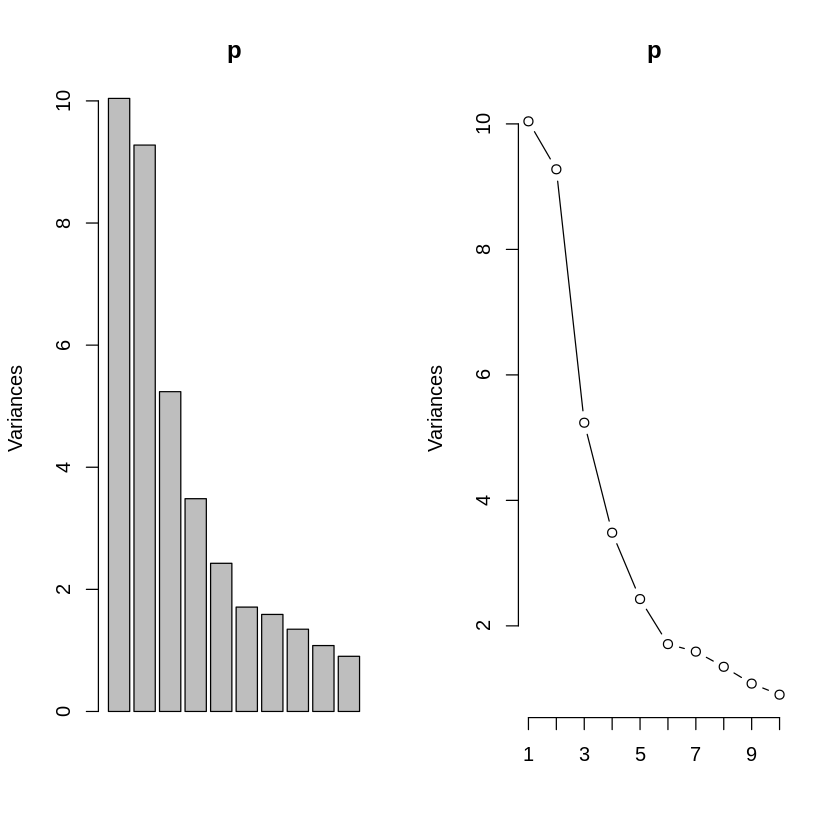

In [53]:
# Screeplot
layout(matrix(1:2, ncol=2))
screeplot(p)
screeplot(p, type="lines")

In [54]:
# Opening the graphical device
tiff("Biplot_a.tiff", width = 1000, height = 1000)

# Creating a plot

biplot(p, 
       cex = 1, 
       xlab = paste("PC1 (24.49% proportion of variance explained)"),
       ylab = paste("PC2 (22.63% proportion of variance explained"))

# Closing the graphical device
dev.off() 

png 
  2

In [55]:
# Opening the graphical device
tiff("Biplot_b.tiff", width = 1000, height = 1000)

# Creating a plot

biplot(p, 
       xlabs = rep(".", nrow(df_for_clustering), cex = 0.4), var.axes = F,
       xlab = paste("PC1 (24.49% proportion of variance explained)"),
       ylab = paste("PC2 (22.63% proportion of variance explained"))

# Closing the graphical device
dev.off() 

png 
  2

In [56]:
# Opening the graphical device
tiff("Biplot_c.tiff", width = 1000, height = 1000)

#main = "Biplot showing relationship between ethnic groups and genetic variants"

# Creating a plot

biplot(p, 
       ylabs = rep(".", ncol(df_for_clustering), cex = 0.4), var.axes = F,
       xlab = paste("PC1 (24.49% proportion of variance explained)"),
       ylab = paste("PC2 (22.63% proportion of variance explained"))

# Closing the graphical device
dev.off()

png 
  2

## transfer cluster analysis files into a folder

In [57]:
dir.create("./clusterAnalysis")
file.rename(from = "./Biplot_a.tiff", to = "./clusterAnalysis/Biplot_a.tiff")
file.rename(from = "./Biplot_b.tiff", to = "./clusterAnalysis/Biplot_b.tiff")
file.rename(from = "./Biplot_c.tiff", to = "./clusterAnalysis/Biplot_c.tiff")
file.rename(from = "./dendogram_population_groups.tiff", to = "./clusterAnalysis/dendogram_population_groups.tiff")

Warning message in dir.create("./clusterAnalysis"):
“'./clusterAnalysis' already exists”


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE